# PCA with All peptides - Keep all peptides in all samples

**Keep all Peptides**: Becase so many peptides are dropped when running the PCA, I wanted to look at what the plots would look like if all peptides are kept.  In order to try and help with variation between samples, singletons are more closely regulated and dropped from corresponding samples (N14 singletons don't appear in N15 sample and vice versa).  However, as seen in these plots, this did little to overcome the major run to run variation

In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append('..')
from scripts import census_parser as cp
%matplotlib inline

In [2]:
BASE_DIR = '../data'
l_tail = 'rawXtractor/census-out.txt'
h_tail = 'rawXtractor/n15_search/census-out.txt'

In [3]:
def clean_pca_df(df, verbose = True):
    """
    Removes peptides from the DF that are not quantified in ALL samples
    """
    if verbose:
        print('Starting peptides: ', len(df.T))
    df = df.T.reset_index().T[2:].replace(np.log2(0), np.nan).fillna(0)
    if verbose:
        print('Peptides afer Cleaning: ', len(df.T))
    return df

In [4]:
def make_pca_df(samples, group = '', clean = False):
    dfs = []
    for sample in samples:
        light_file = os.path.join(BASE_DIR, sample, l_tail)
        heavy_file = os.path.join(BASE_DIR, sample, h_tail)
        dfs.append(list(cp.parse_l_h_together(light_file, heavy_file, only_s = True))) 
    if group:
        df = cp.prep_for_pca2(dfs, name = group)
    else:
        df = cp.prep_for_pca2(dfs)
    if clean:
        return clean_pca_df(df)
    return df

---

## Plot PCA for different Sample Combinations

### Fist All unenriched samples collected so far

In [5]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121', '20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111', '20160331-UnerFecal-Lys-N14N15-Pool']

In [6]:
df = make_pca_df(samples, clean = True)

Starting peptides:  4916
Peptides afer Cleaning:  4916


explained variance ratios: [ 0.24583072  0.18821143]


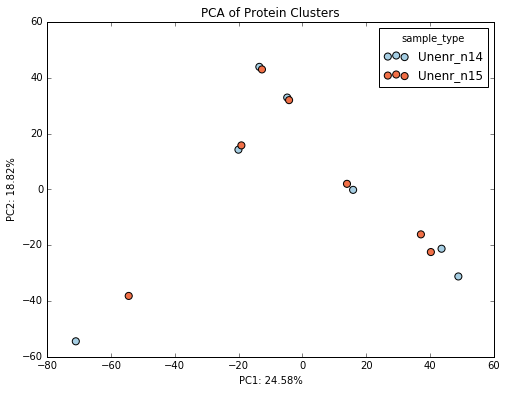

In [7]:
cp.plot_pca(df)

explained variance ratios: [ 0.24583072  0.18821143]


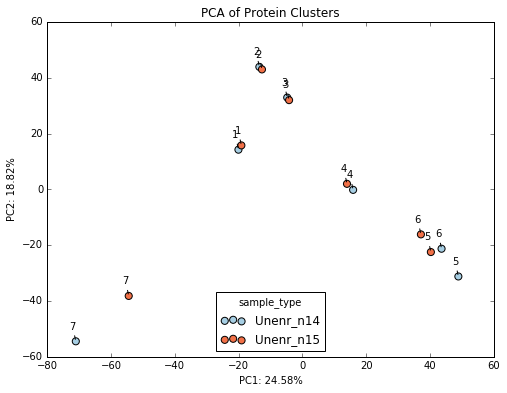

In [8]:
cp.plot_pca(df, labels = True, loc = 8)

### Just the Peptides from samples collected on 11/11/2015

In [9]:
samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
df = make_pca_df(samples, clean = True)

Starting peptides:  2841
Peptides afer Cleaning:  2841


explained variance ratios: [ 0.43196604  0.37588521]


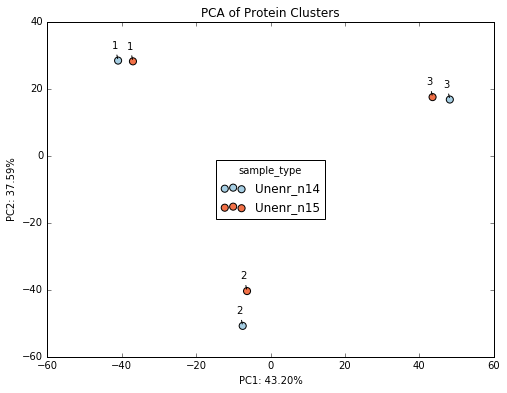

In [10]:
cp.plot_pca(df, labels = True, loc = 10)

### Just the smaples collected on 11/21

In [11]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
df = make_pca_df(samples, clean = True)

Starting peptides:  2573
Peptides afer Cleaning:  2573


explained variance ratios: [ 0.51514492  0.33965641]


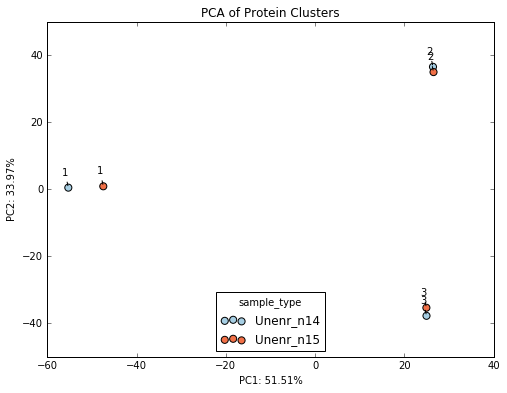

In [12]:
cp.plot_pca(df, loc = 8, labels = True)

## PCA Plot for the Enriched Samples Only

In [13]:
samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [14]:
df = make_pca_df(samples, clean = True, group = 'BioGlyCMK')

Starting peptides:  3243
Peptides afer Cleaning:  3243


explained variance ratios: [ 0.43718913  0.33962283]


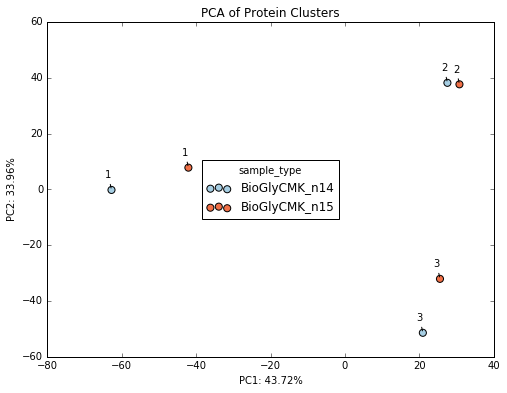

In [15]:
cp.plot_pca(df, loc = 10, labels = True)

## Looking at a PCA with both the Unenriched and Enriched samples  - 

### Start with just 11/11 collection for Unenriched Dataset

In [16]:
unen_samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [17]:
dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  4919
Peptides afer Cleaning:  4919


explained variance ratios: [ 0.29315852  0.1760222 ]


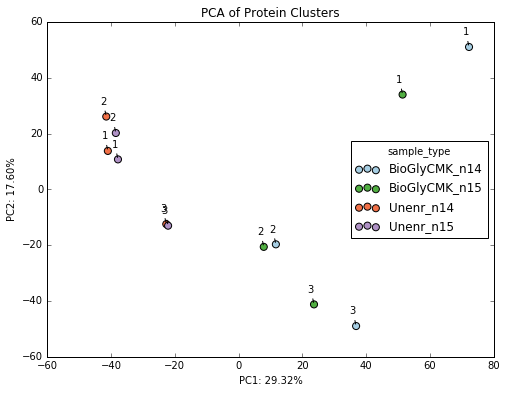

In [18]:
cp.plot_pca(df, loc = 5, labels = True)

Looks like there's still some good separation between n14 and n15, but there is also a separation between the probe enriched samples and the unenriched samples.  There is still a really strong mirror between N14 and N15 samples of the same MS run.

### Looking at Unenriched samples collected on 11/21/15

In [19]:
unen_samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  5129
Peptides afer Cleaning:  5129


explained variance ratios: [ 0.34790294  0.1744362 ]


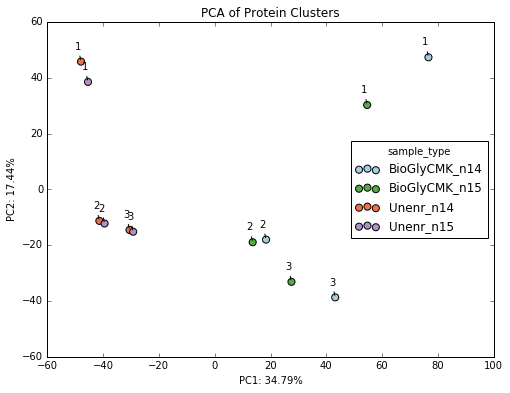

In [20]:
cp.plot_pca(df, loc=5, labels = True)